In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/detect_mask'

/content/drive/MyDrive/detect_mask


In [3]:
!unzip data.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/not_wearing_mask/face5297.jpg  
  inflating: train/not_wearing_mask/face5298.jpg  
  inflating: train/not_wearing_mask/face5301.jpg  
  inflating: train/not_wearing_mask/face5302.jpg  
  inflating: train/not_wearing_mask/face5303.jpg  
  inflating: train/not_wearing_mask/face5304.jpg  
  inflating: train/not_wearing_mask/face5305.jpg  
  inflating: train/not_wearing_mask/face5306.jpg  
  inflating: train/not_wearing_mask/face5310.jpg  
  inflating: train/not_wearing_mask/face5313.jpg  
  inflating: train/not_wearing_mask/face5314.jpg  
  inflating: train/not_wearing_mask/face5315.jpg  
  inflating: train/not_wearing_mask/face5316.jpg  
  inflating: train/not_wearing_mask/face5319.jpg  
  inflating: train/not_wearing_mask/face5321.jpg  
  inflating: train/not_wearing_mask/face5322.jpg  
  inflating: train/not_wearing_mask/face5323.jpg  
  inflating: train/not_wearing_mask/face5326.jpg  
  in

In [4]:
! git clone https://github.com/aqeelanwar/MaskTheFace.git

Cloning into 'MaskTheFace'...
remote: Enumerating objects: 3131, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 3131 (delta 4), reused 0 (delta 0), pack-reused 3122
Receiving objects: 100% (3131/3131), 235.03 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (254/254), done.


In [5]:
cd 'MaskTheFace'

/content/drive/MyDrive/detect_mask/MaskTheFace


In [6]:
!pip install torch torchvision
!pip install wandb
!pip install scikit-learn
!pip install matplotlib seaborn
!pip install dotmap
!pip install dlib
!pip install face-recognition
!pip install face-recognition-models

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# 1. Setup and Data Preparation

In [7]:
! python mask_the_face.py --path "/content/drive/MyDrive/detect_mask/train/not_wearing_mask" --mask_type "random"

--------------------------------------------------------------
----------------------- Get dlib model -----------------------
--------------------------------------------------------------
Zip file size:  61.07 MB
Saving dlib model...
Extracting dlib model...
Saved:  dlib_models/shape_predictor_68_face_landmarks.dat.bz2
--------------------------------------------------------------
---------------------------- done ----------------------------
--------------------------------------------------------------
 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
-------------------------------------------------------------
-------------------- Masking image files --------------------
-------------------------------------

In [8]:
! python mask_the_face.py --path "/content/drive/MyDrive/detect_mask/val/not_wearing_mask" --mask_type "random"

 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
-------------------------------------------------------------
-------------------- Masking image files --------------------
-------------------------------------------------------------
100% 2000/2000 [03:10<00:00, 10.48it/s]
-------------------------------------------------------------
----------------- Masking image directories -----------------
-------------------------------------------------------------
0it [00:00, ?it/s]
Processing Done


In [9]:
# Basic libraries
import os
import numpy as np
import pandas as pd
from PIL import Image

# PyTorch and Torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models, transforms
from torchvision.datasets import ImageFolder

# Visualization
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import seaborn as sns

# Mask generation tool
# Ensure MaskTheFace tool is cloned and installed properly

# Scikit-learn for metrics
from sklearn.metrics import roc_curve, auc



In [10]:
# WandB for experiment tracking and visualization
import wandb

# Initialize WandB
wandb.init(project='mask-detection')

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Since after applying the "MaskTheFace" function, it has created a folder named "not_wearing_mask_masked". We want it now in the "wearing_mask" folder

In [11]:
import os
import shutil

def copy_images(source_dir, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    for filename in os.listdir(source_dir):
        source_file = os.path.join(source_dir, filename)
        target_file = os.path.join(target_dir, filename)
        if os.path.isfile(source_file):
            shutil.copy(source_file, target_file)

# Copy images to create a wearing_mask directory
train_masked_dir = '/content/drive/MyDrive/detect_mask/train/not_wearing_mask_masked'
train_wearing_mask_dir = '/content/drive/MyDrive/detect_mask/train/wearing_mask'

val_masked_dir = '/content/drive/MyDrive/detect_mask/val/not_wearing_mask_masked'
val_wearing_mask_dir = '/content/drive/MyDrive/detect_mask/val/wearing_mask'

#train_masked_dir = '/content/drive/MyDrive/DATA/Masktheface/val/train/not_wearing_mask_masked'
#train_wearing_mask_dir = '/content/drive/MyDrive/DATA/Masktheface/train/wearing_mask'

#val_masked_dir = '/content/drive/MyDrive/DATA/Masktheface/val/not_wearing_mask_masked'
#val_wearing_mask_dir = '/content/drive/MyDrive/DATA/Masktheface/val/wearing_mask'



copy_images(train_masked_dir, train_wearing_mask_dir)
copy_images(val_masked_dir, val_wearing_mask_dir)


In [12]:
import shutil

# Paths to the directories
train_masked_dir = '/content/drive/MyDrive/detect_mask/train/not_wearing_mask_masked'
val_masked_dir = '/content/drive/MyDrive/detect_mask/val/not_wearing_mask_masked'

# Delete the directories
if os.path.exists(train_masked_dir):
    shutil.rmtree(train_masked_dir)

if os.path.exists(val_masked_dir):
    shutil.rmtree(val_masked_dir)

print("Folders deleted successfully.")

Folders deleted successfully.


# 3. Data Loader

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms


train_transform = torchvision.transforms.Compose([
                                                  transforms.RandomHorizontalFlip(p=0.3),
                                                  transforms.RandomRotation(degrees=(-30, 30)),
                                                  transforms.RandomResizedCrop(112),
                                                  transforms.ToTensor(),
])

val_transform = torchvision.transforms.Compose([

                                                transforms.RandomResizedCrop(112),
                                                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
                                                transforms.RandomRotation(degrees=(-30, 30)),
                                                transforms.ToTensor(),
])

In [14]:
# Paths to the dataset
train_path = "/content/drive/MyDrive/detect_mask/train"
val_path = "/content/drive/MyDrive/detect_mask/val"
#train_path = "/content/drive/MyDrive/DATA/Masktheface/train"
#val_path = "/content/drive/MyDrive/DATA/Masktheface/val"

# Create ImageFolder instances
train_data = ImageFolder(root=train_path, transform=train_transform, target_transform=None)
val_data = ImageFolder(root=val_path, transform=val_transform, target_transform=None)

# Print class indices
print("Training data class to index mapping:", train_data.class_to_idx)
print("Validation data class to index mapping:", val_data.class_to_idx)


Training data class to index mapping: {'not_wearing_mask': 0, 'wearing_mask': 1}
Validation data class to index mapping: {'not_wearing_mask': 0, 'wearing_mask': 1}


In [15]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

In [16]:
import os
from PIL import Image
from torchvision.transforms import ToPILImage

# Function to save transformed images
def save_transformed_images(dataset, transform, save_dir):
    for idx, (image, label) in enumerate(dataset):
        # Convert tensor back to PIL image
        pil_image = ToPILImage()(image)
        # Apply transformation
        transformed_image = transform(pil_image)
        # Generate save path within the original structure
        label_dir = os.path.join(save_dir, dataset.classes[label])
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)
        save_path = os.path.join(label_dir, f'image_{idx}.jpg')
        # Convert the transformed tensor back to PIL image and save
        transformed_image_pil = ToPILImage()(transformed_image)
        transformed_image_pil.save(save_path)

# Paths to original datasets
train_dir = '/content/drive/MyDrive/detect_mask/train'
val_dir = '/content/drive/MyDrive/detect_mask/val'

# Create datasets without transformations to load the original images
train_dataset_no_transform = datasets.ImageFolder(root=train_dir, transform=transforms.ToTensor())
val_dataset_no_transform = datasets.ImageFolder(root=val_dir, transform=transforms.ToTensor())

# Save transformed training images back to original directory
save_transformed_images(train_dataset_no_transform, train_transform, train_dir)

# Save transformed validation images back to original directory
save_transformed_images(val_dataset_no_transform, val_transform, val_dir)

# 4. Model definition

In [17]:
import torch.nn as nn
from torchvision import models

# Load ResNet-50 model
model = models.resnet50(pretrained=False)

# Modify the classifier for binary classification
model.fc = nn.Linear(model.fc.in_features, 1)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# 5. Training the model

  0%|          | 0/186 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


Epoch 1/50, Train Loss: 0.4255, Train Accuracy: 0.8639, Val Loss: 130.1342, Val Accuracy: 0.4980


100%|██████████| 62/62 [00:31<00:00,  1.98it/s]


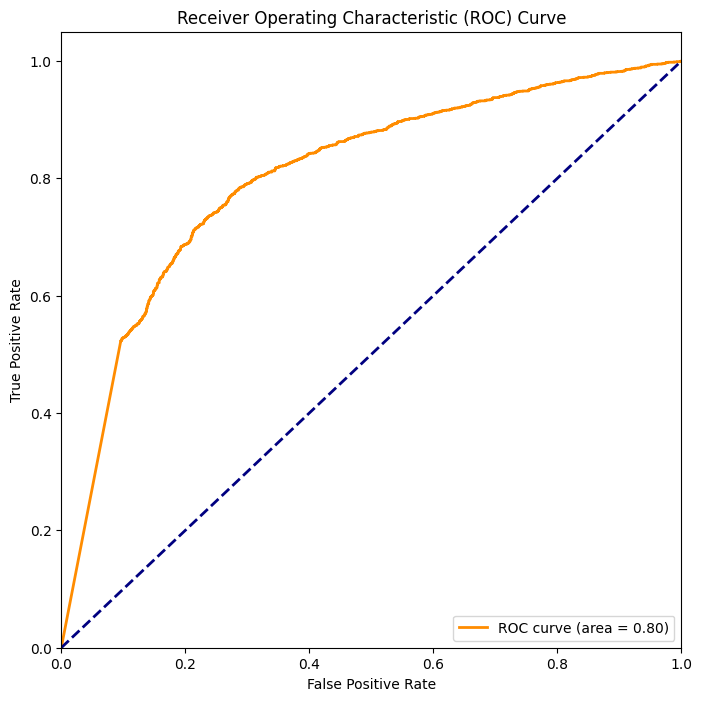

100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


Epoch 2/50, Train Loss: 0.3287, Train Accuracy: 0.8877, Val Loss: 0.3505, Val Accuracy: 0.8664


100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


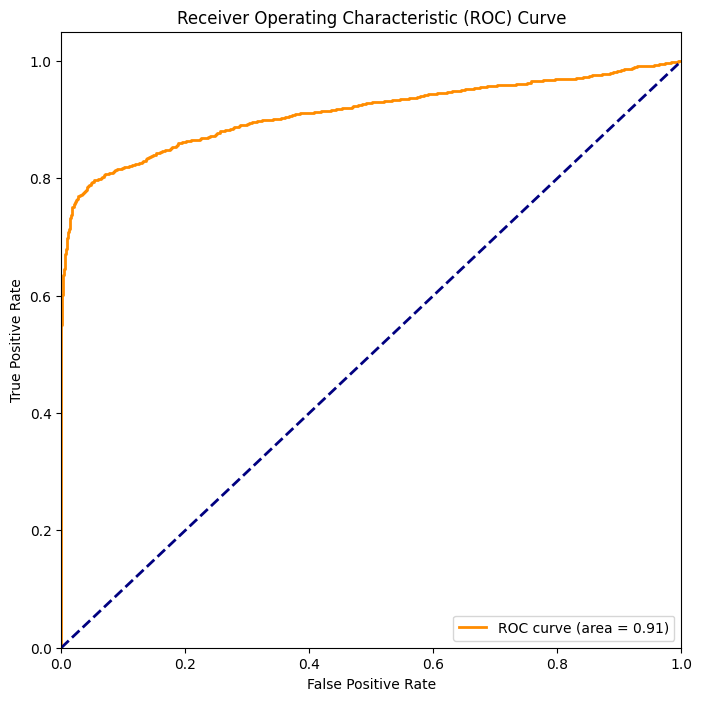

100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


Epoch 3/50, Train Loss: 0.2737, Train Accuracy: 0.8990, Val Loss: 0.3763, Val Accuracy: 0.8301


100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


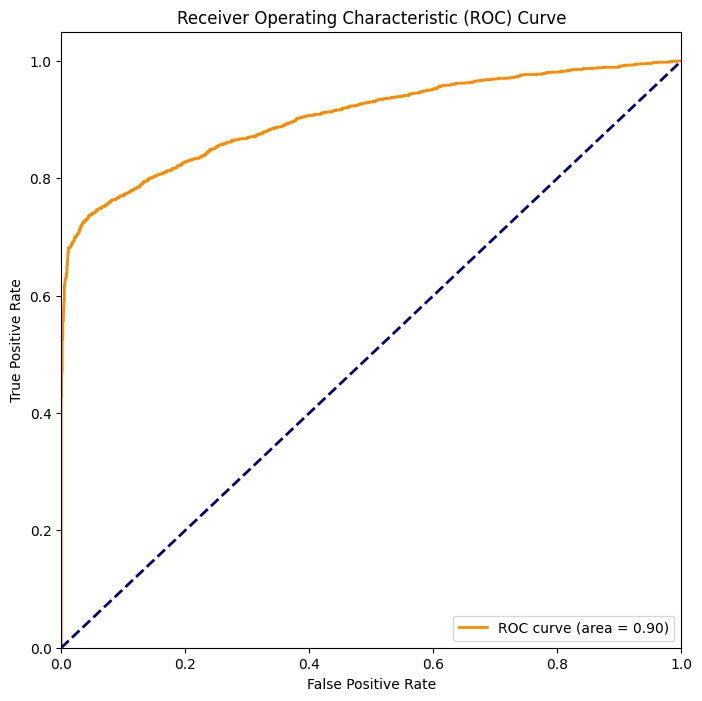

100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


Epoch 4/50, Train Loss: 0.2623, Train Accuracy: 0.9040, Val Loss: 0.3375, Val Accuracy: 0.8606


100%|██████████| 62/62 [00:30<00:00,  2.02it/s]


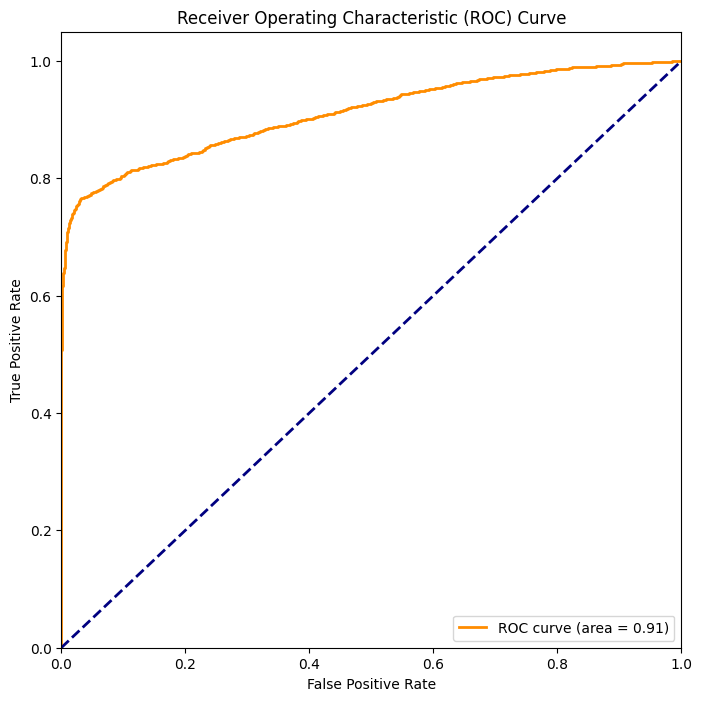

100%|██████████| 62/62 [00:31<00:00,  1.99it/s]


Epoch 5/50, Train Loss: 0.2240, Train Accuracy: 0.9130, Val Loss: 0.3487, Val Accuracy: 0.8374


100%|██████████| 62/62 [00:30<00:00,  2.04it/s]


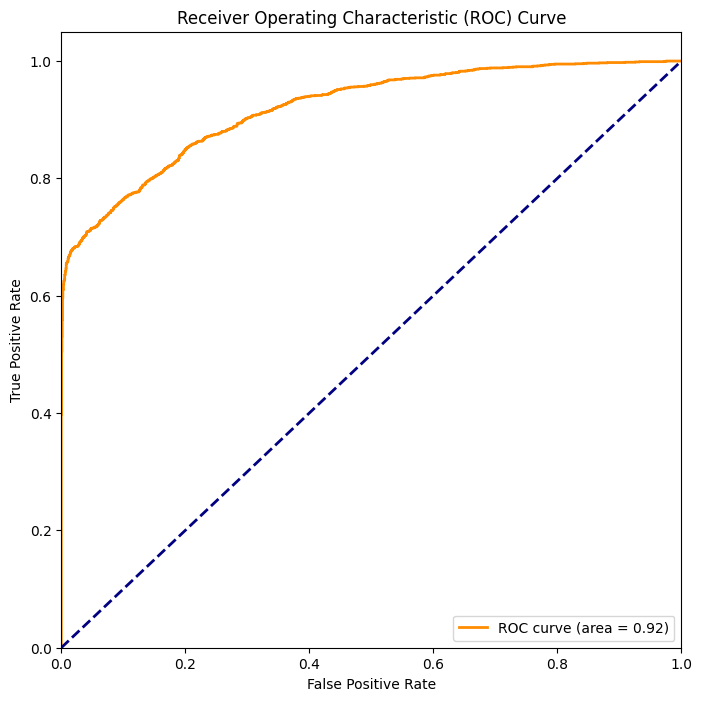

100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


Epoch 6/50, Train Loss: 0.1894, Train Accuracy: 0.9221, Val Loss: 0.2573, Val Accuracy: 0.8917


100%|██████████| 62/62 [00:29<00:00,  2.07it/s]


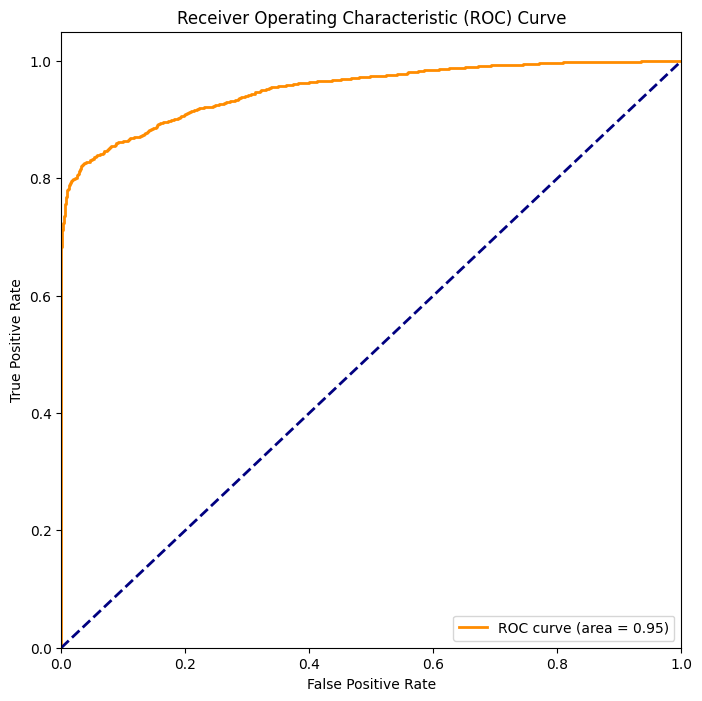

100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


Epoch 7/50, Train Loss: 0.1673, Train Accuracy: 0.9313, Val Loss: 0.2681, Val Accuracy: 0.8899


100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


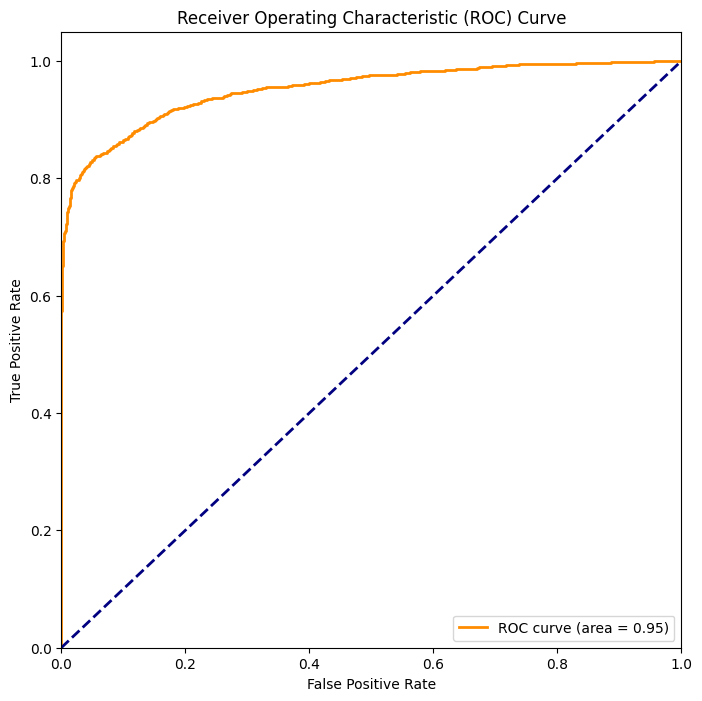

100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


Epoch 8/50, Train Loss: 0.1470, Train Accuracy: 0.9378, Val Loss: 0.4122, Val Accuracy: 0.7944


100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


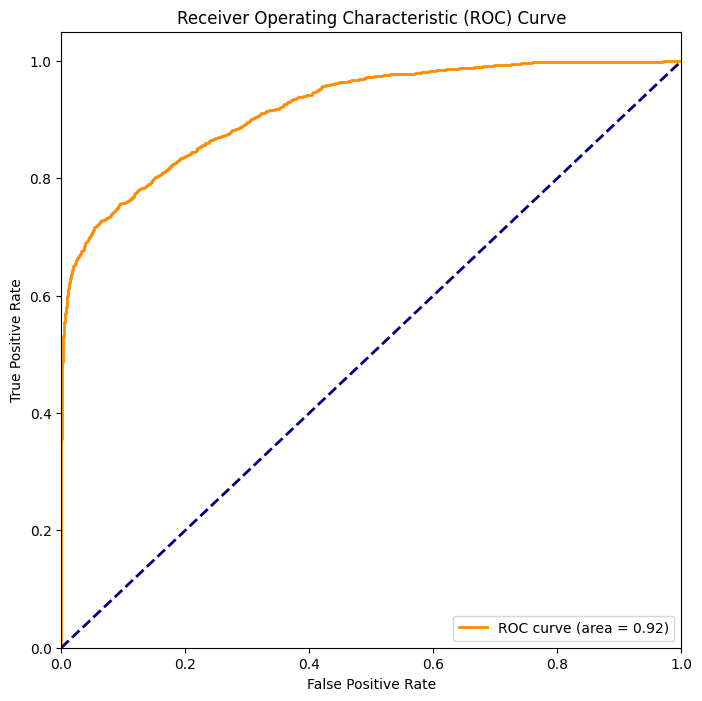

100%|██████████| 62/62 [00:29<00:00,  2.07it/s]


Epoch 9/50, Train Loss: 0.1391, Train Accuracy: 0.9428, Val Loss: 0.8920, Val Accuracy: 0.8280


100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


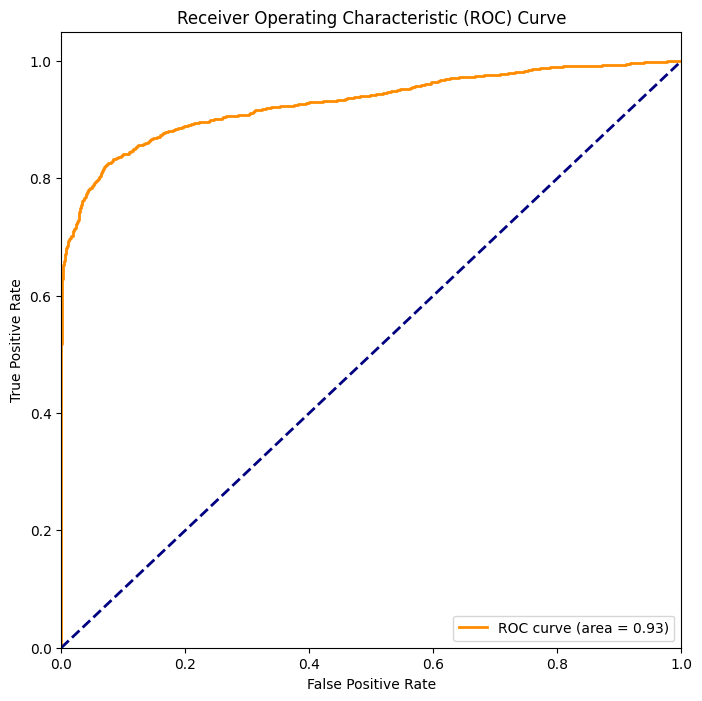

100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


Epoch 10/50, Train Loss: 0.1398, Train Accuracy: 0.9419, Val Loss: 0.2218, Val Accuracy: 0.9111


100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


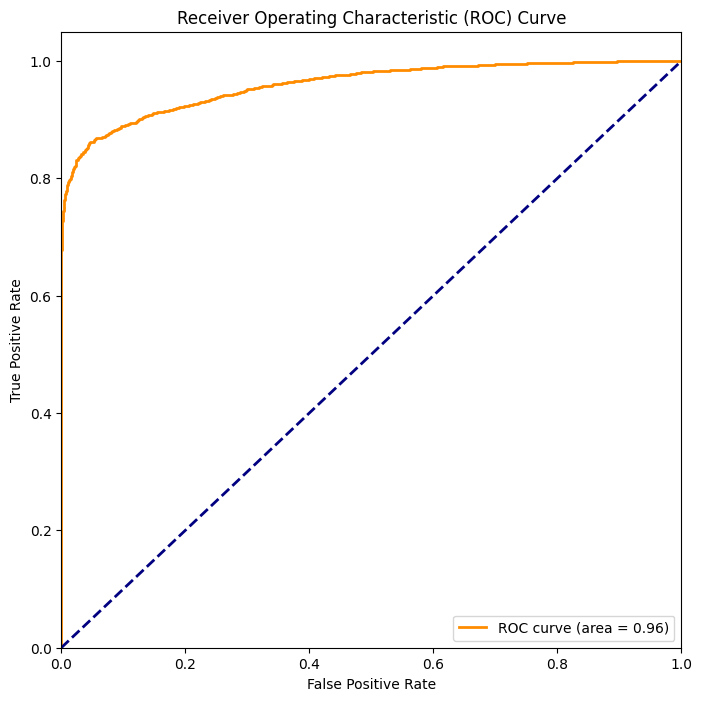

100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


Epoch 11/50, Train Loss: 0.1288, Train Accuracy: 0.9478, Val Loss: 0.2804, Val Accuracy: 0.8689


100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


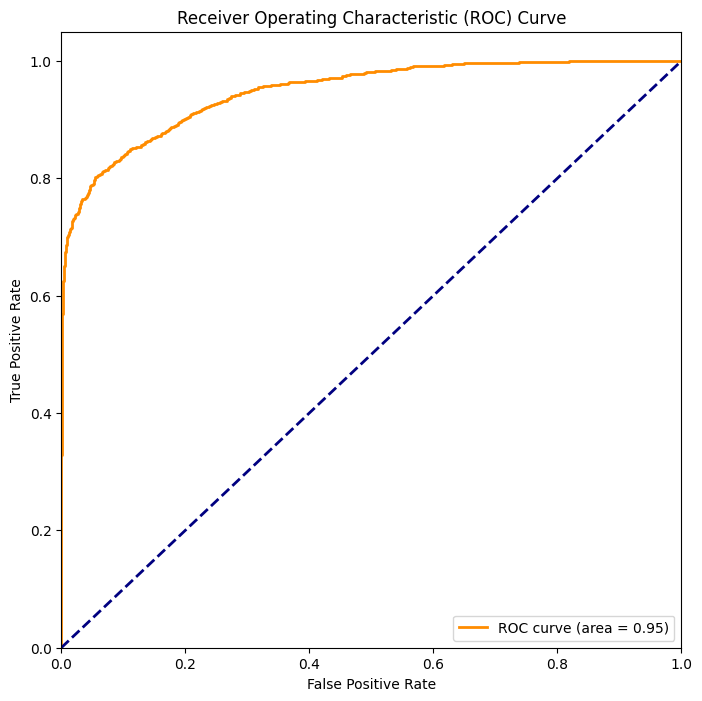

100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


Epoch 12/50, Train Loss: 0.1135, Train Accuracy: 0.9544, Val Loss: 0.2589, Val Accuracy: 0.8758


100%|██████████| 62/62 [00:30<00:00,  2.04it/s]


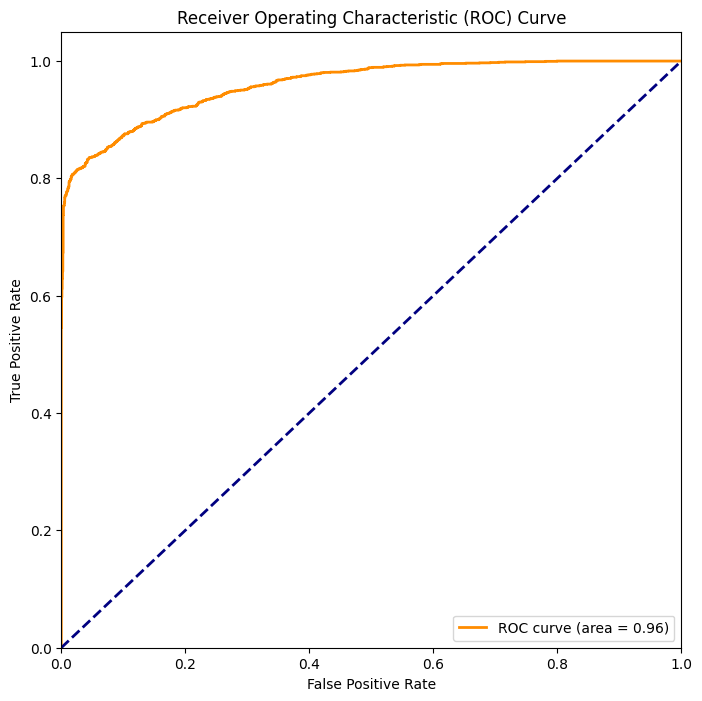

100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


Epoch 13/50, Train Loss: 0.1208, Train Accuracy: 0.9512, Val Loss: 0.4166, Val Accuracy: 0.8000


100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


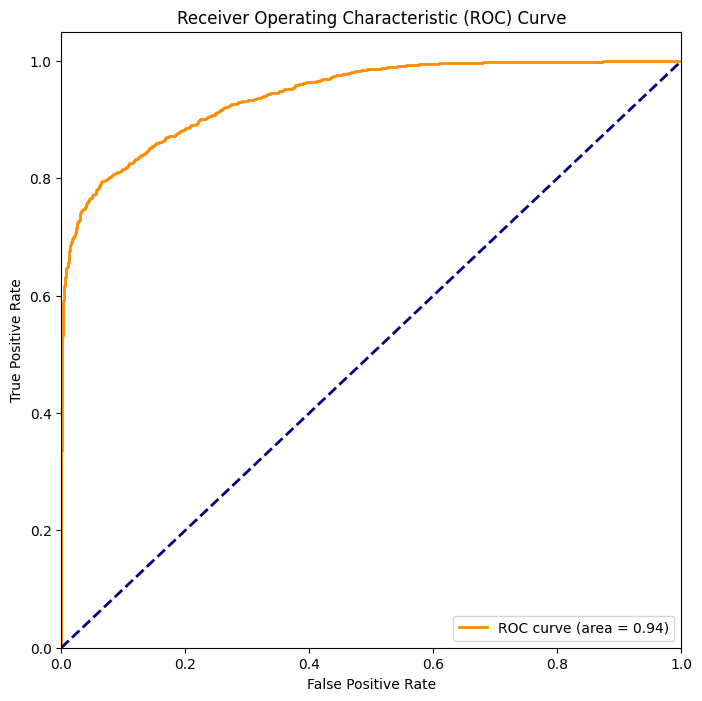

100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


Epoch 14/50, Train Loss: 0.1094, Train Accuracy: 0.9549, Val Loss: 0.2623, Val Accuracy: 0.8914


100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


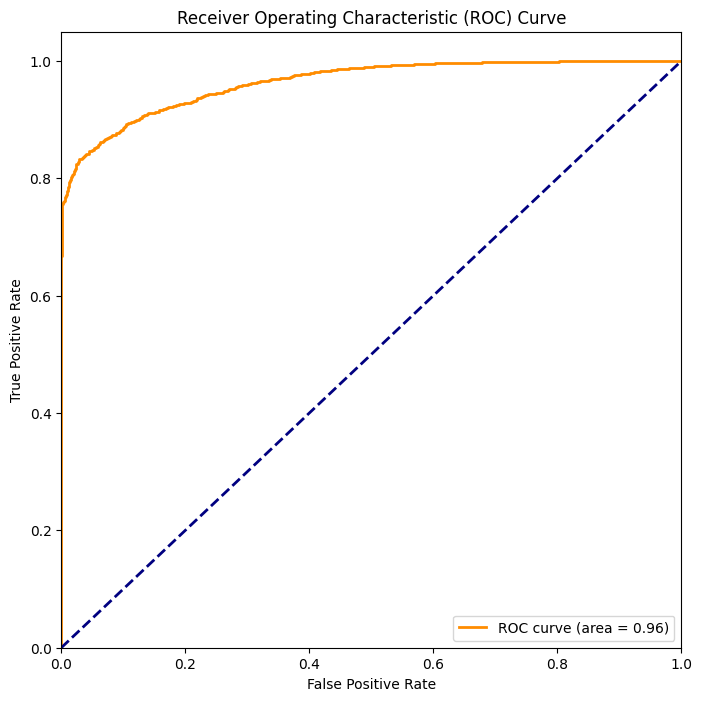

100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


Epoch 15/50, Train Loss: 0.1137, Train Accuracy: 0.9540, Val Loss: 0.2434, Val Accuracy: 0.9051


100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


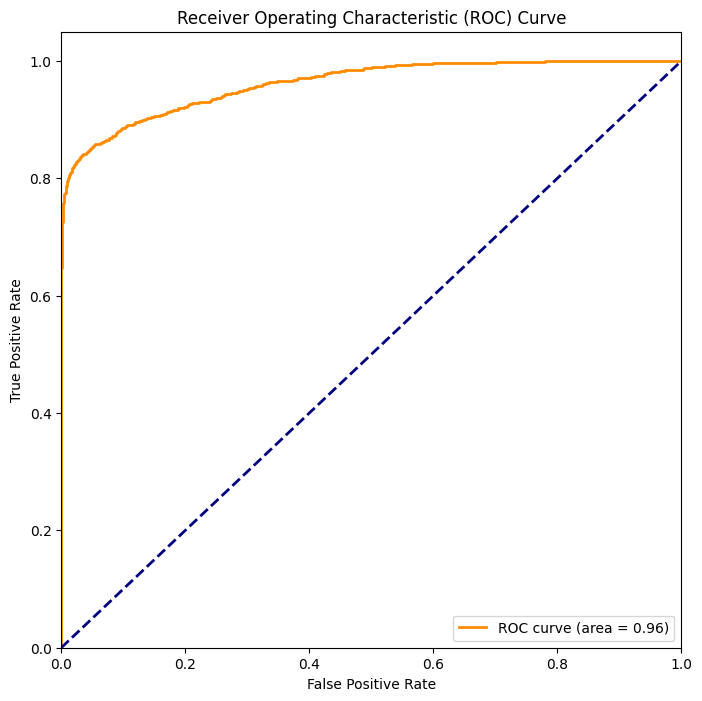

100%|██████████| 62/62 [00:28<00:00,  2.17it/s]


Epoch 16/50, Train Loss: 0.1135, Train Accuracy: 0.9534, Val Loss: 0.2638, Val Accuracy: 0.8922


100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


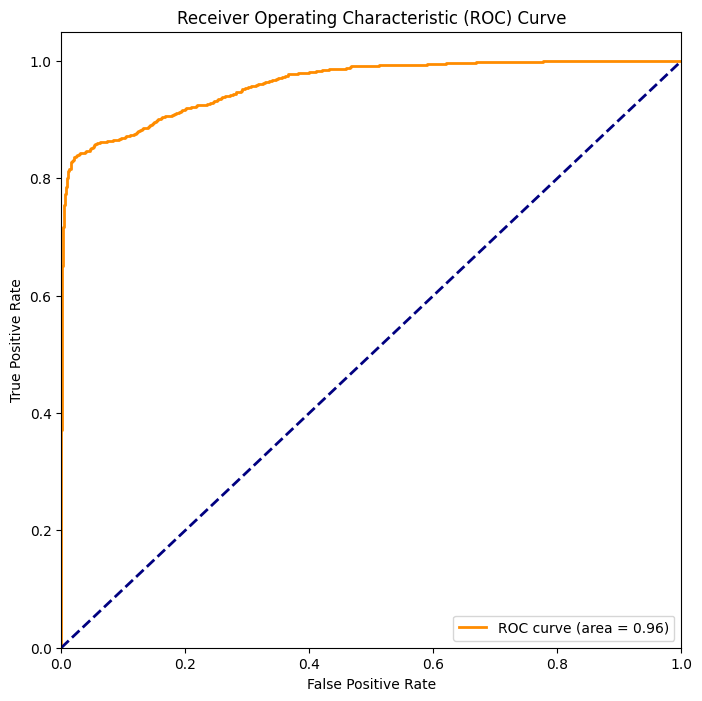

100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


Epoch 17/50, Train Loss: 0.1025, Train Accuracy: 0.9579, Val Loss: 0.2507, Val Accuracy: 0.9242


100%|██████████| 62/62 [00:29<00:00,  2.07it/s]


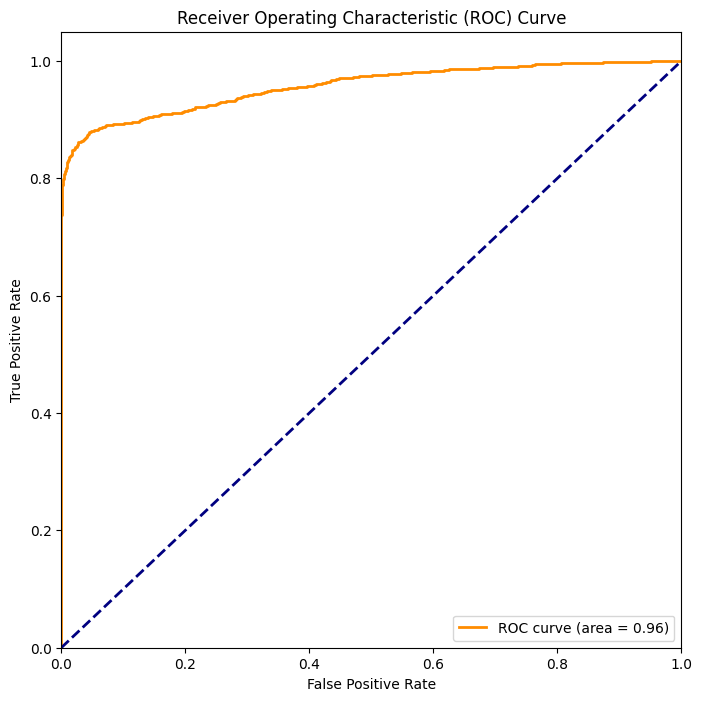

100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


Epoch 18/50, Train Loss: 0.0974, Train Accuracy: 0.9623, Val Loss: 1.4953, Val Accuracy: 0.6146


100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


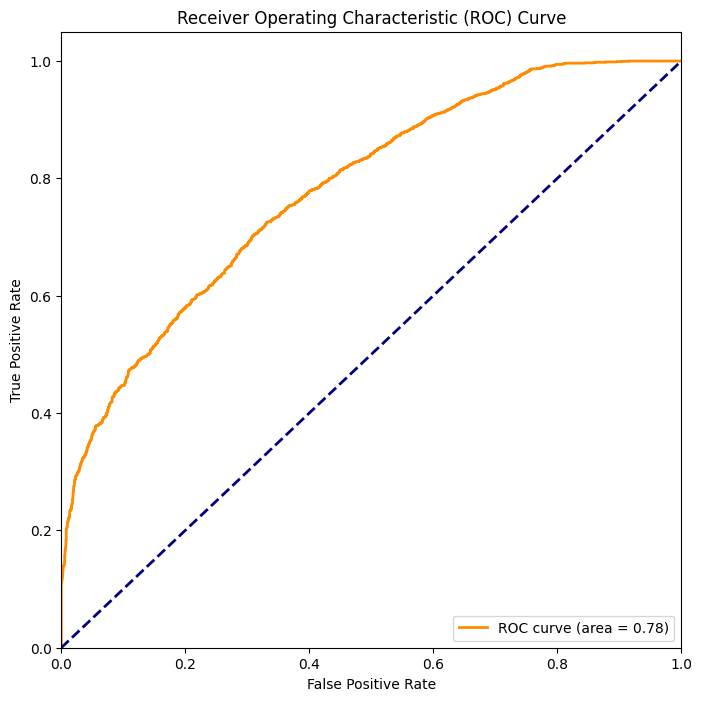

100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


Epoch 19/50, Train Loss: 0.0963, Train Accuracy: 0.9588, Val Loss: 0.3400, Val Accuracy: 0.8745


100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


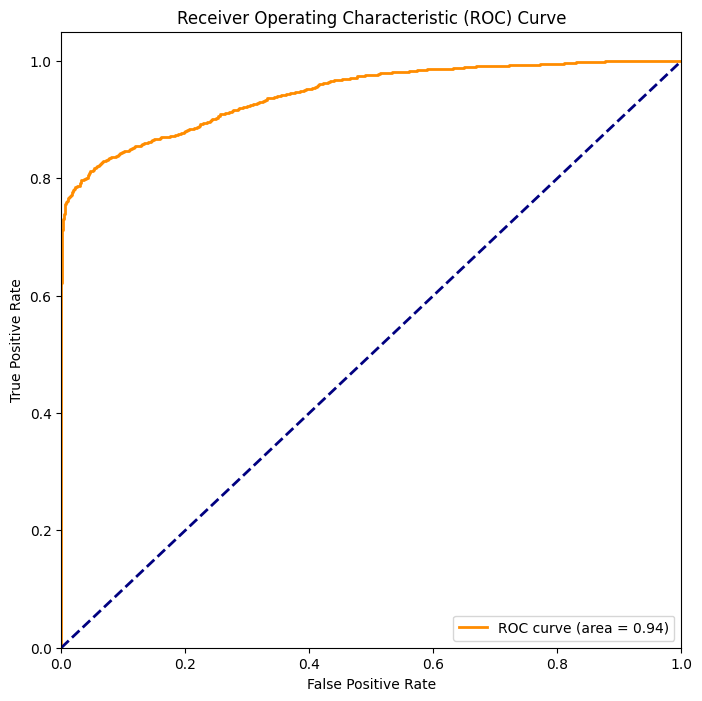

100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


Epoch 20/50, Train Loss: 0.0969, Train Accuracy: 0.9612, Val Loss: 0.4263, Val Accuracy: 0.8490


100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


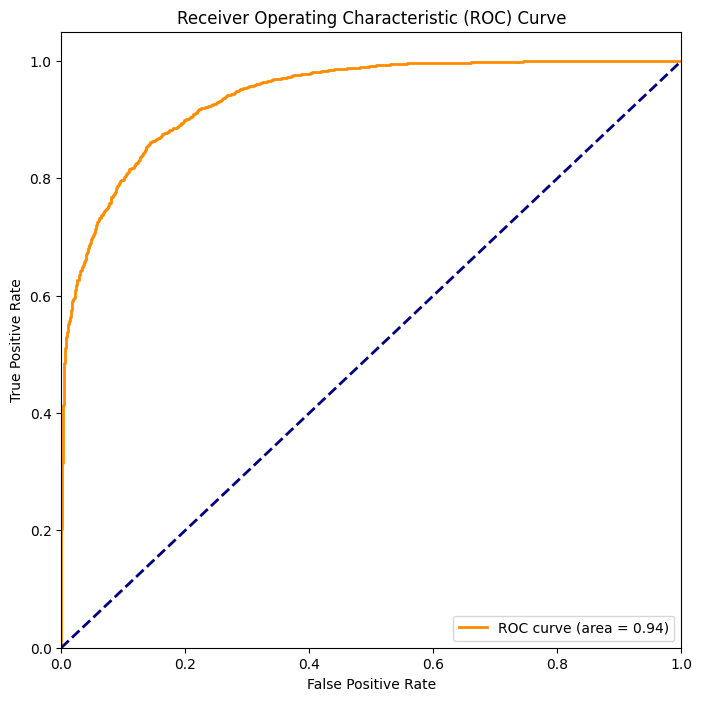

100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


Epoch 21/50, Train Loss: 0.0944, Train Accuracy: 0.9595, Val Loss: 0.2481, Val Accuracy: 0.9015


100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


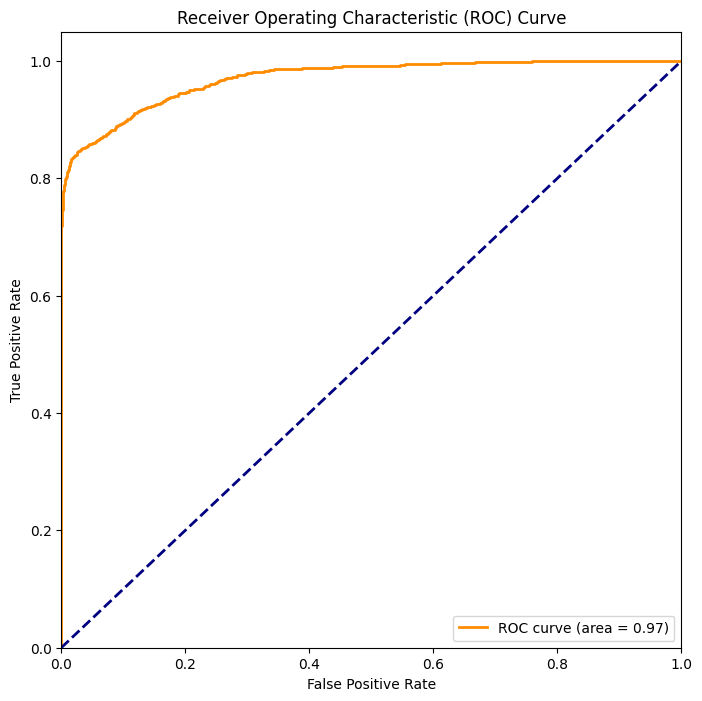

100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


Epoch 22/50, Train Loss: 0.0963, Train Accuracy: 0.9614, Val Loss: 0.2841, Val Accuracy: 0.8652


100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


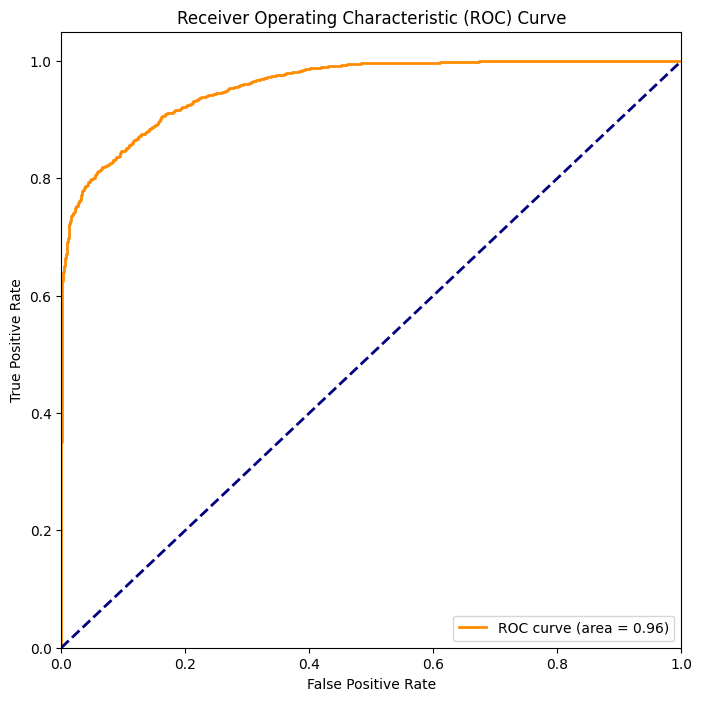

100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


Epoch 23/50, Train Loss: 0.1013, Train Accuracy: 0.9574, Val Loss: 0.2830, Val Accuracy: 0.8740


100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


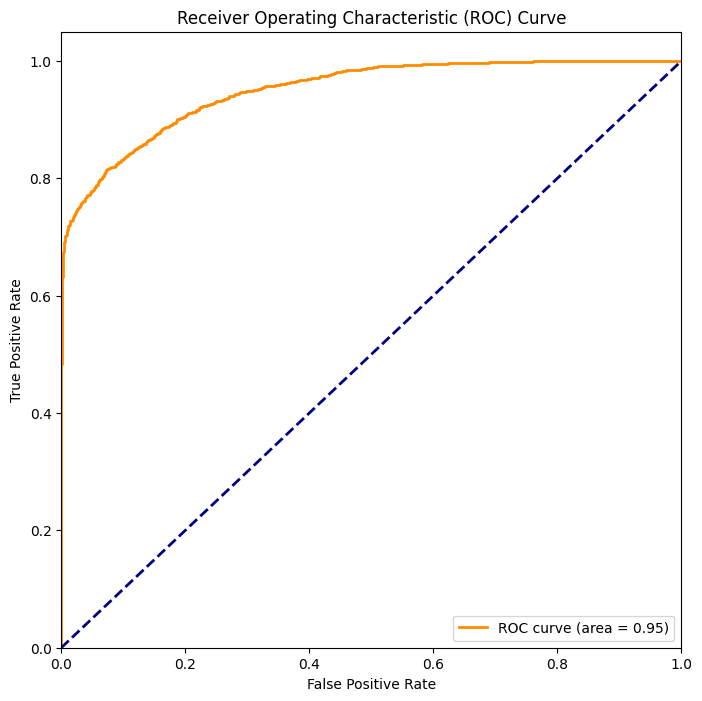

100%|██████████| 62/62 [00:28<00:00,  2.19it/s]


Epoch 24/50, Train Loss: 0.0969, Train Accuracy: 0.9595, Val Loss: 0.3166, Val Accuracy: 0.8571


100%|██████████| 62/62 [00:30<00:00,  2.05it/s]


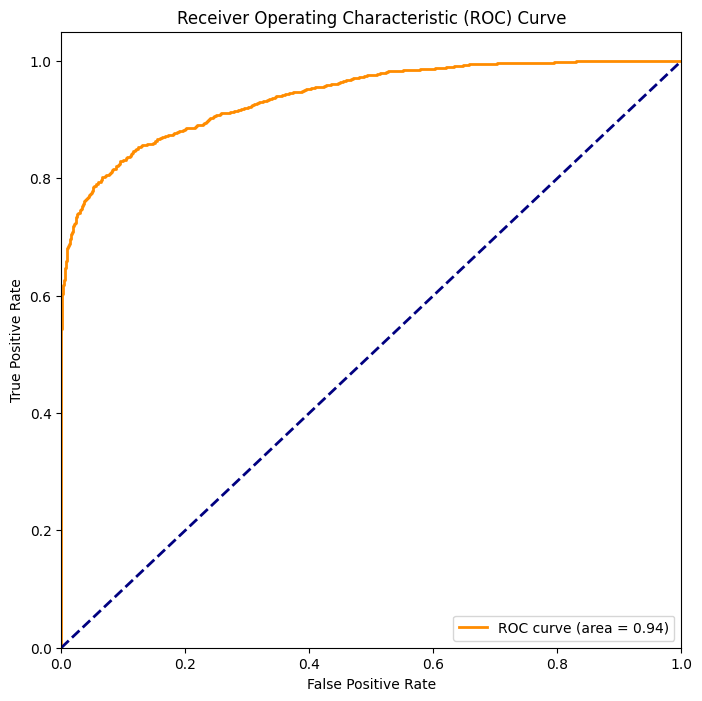

100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


Epoch 25/50, Train Loss: 0.0860, Train Accuracy: 0.9644, Val Loss: 0.8551, Val Accuracy: 0.7543


100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


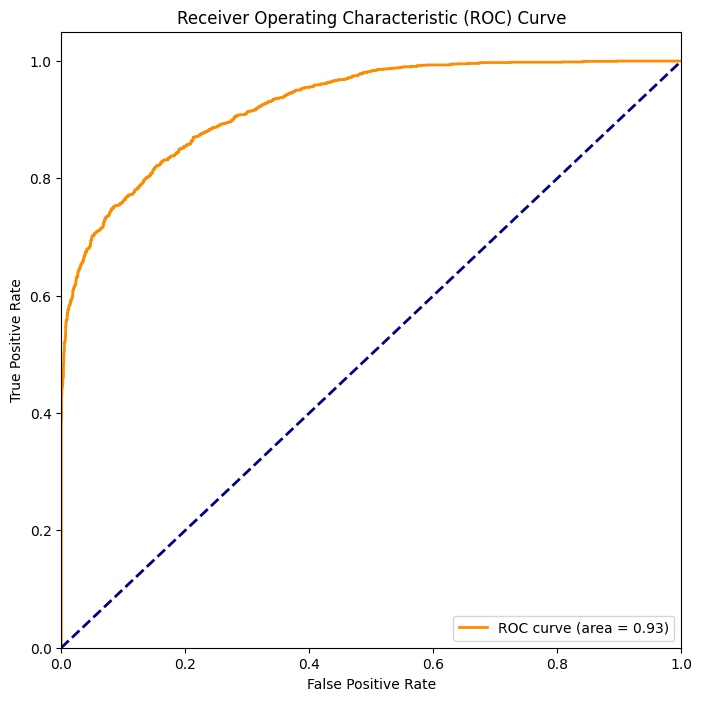

100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


Epoch 26/50, Train Loss: 0.0862, Train Accuracy: 0.9637, Val Loss: 0.2379, Val Accuracy: 0.8992


100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


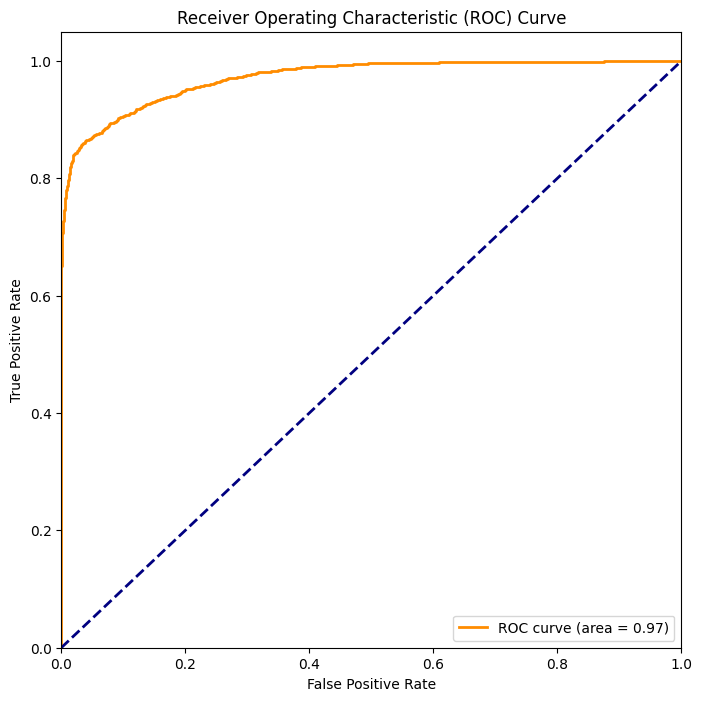

100%|██████████| 62/62 [00:28<00:00,  2.17it/s]


Epoch 27/50, Train Loss: 0.0803, Train Accuracy: 0.9653, Val Loss: 0.2330, Val Accuracy: 0.8881


100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


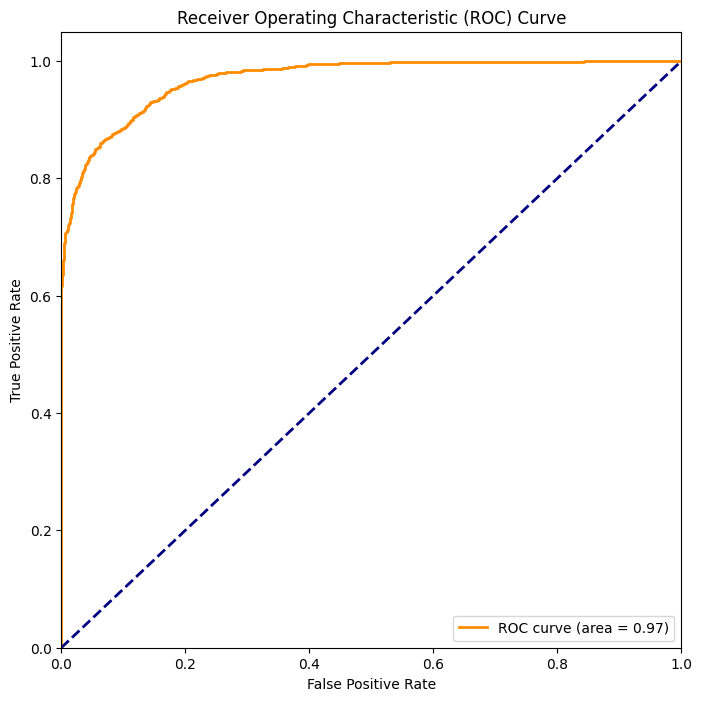

100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


Epoch 28/50, Train Loss: 0.0914, Train Accuracy: 0.9619, Val Loss: 0.2745, Val Accuracy: 0.8674


100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


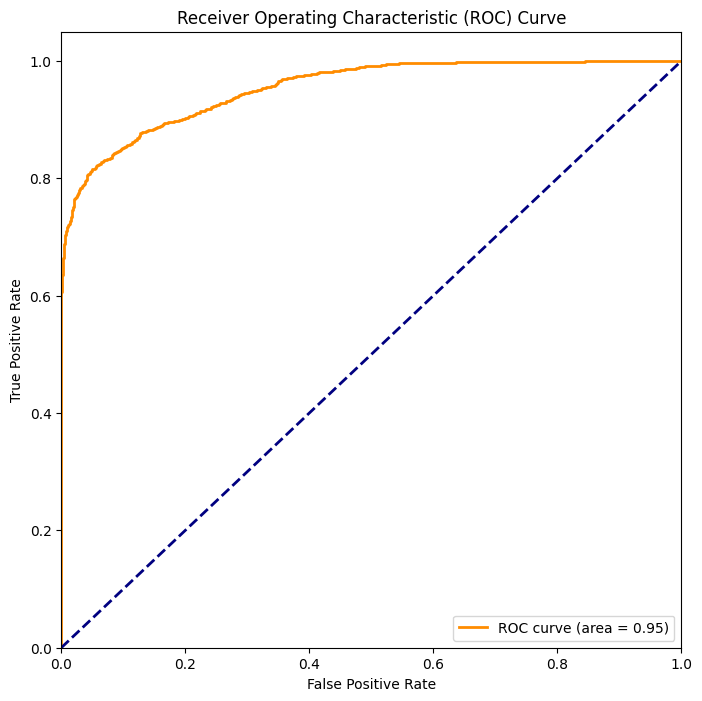

100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


Epoch 29/50, Train Loss: 0.0815, Train Accuracy: 0.9646, Val Loss: 0.3041, Val Accuracy: 0.8861


100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


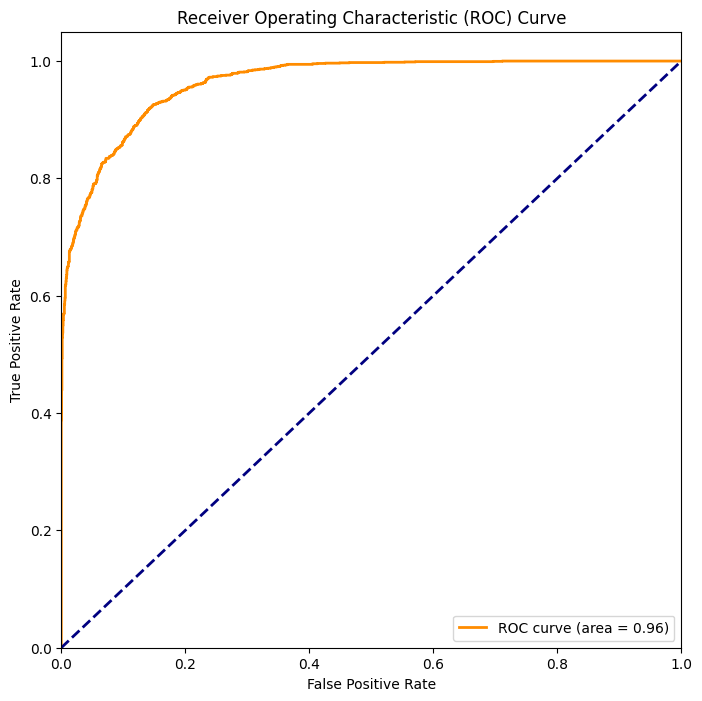

100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


Epoch 30/50, Train Loss: 0.0884, Train Accuracy: 0.9614, Val Loss: 0.3328, Val Accuracy: 0.8689


100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


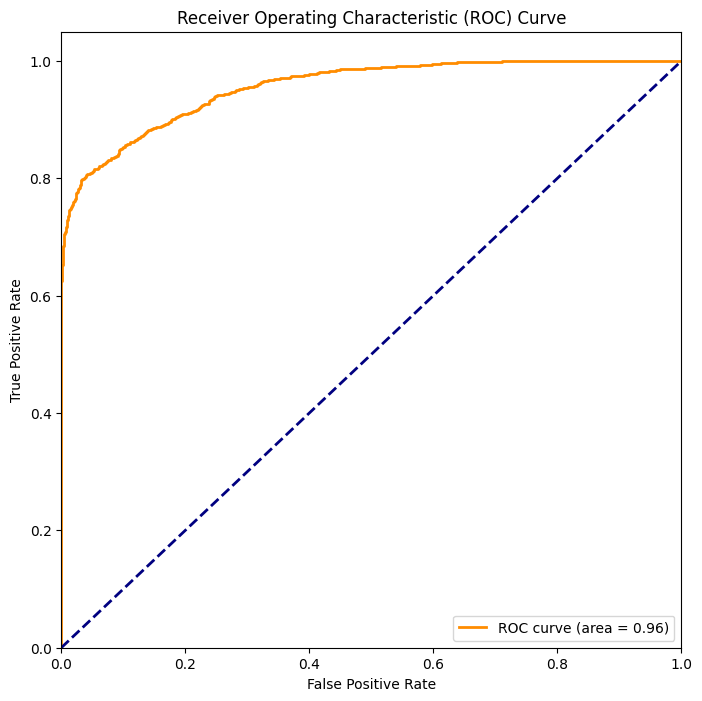

100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


Epoch 31/50, Train Loss: 0.0754, Train Accuracy: 0.9674, Val Loss: 0.3491, Val Accuracy: 0.8386


100%|██████████| 62/62 [00:30<00:00,  2.03it/s]


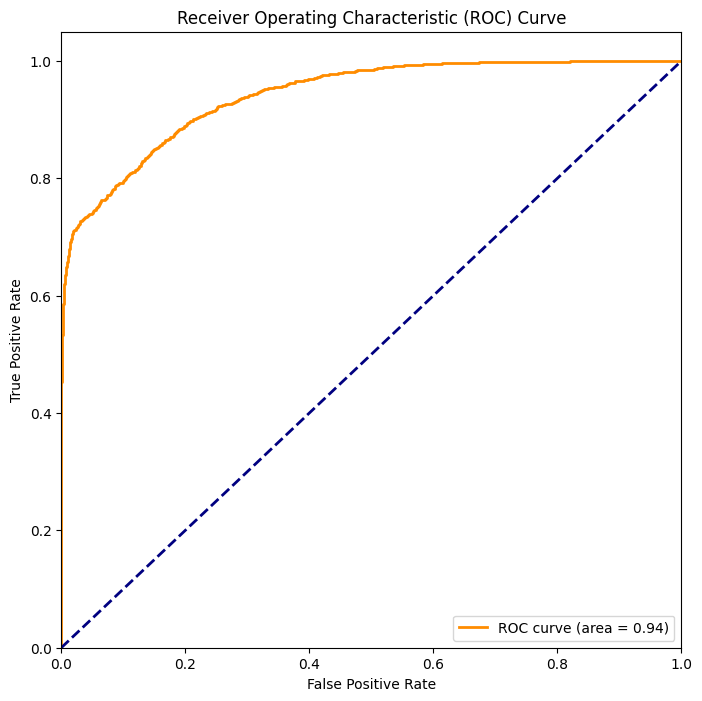

100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


Epoch 32/50, Train Loss: 0.0915, Train Accuracy: 0.9600, Val Loss: 0.2521, Val Accuracy: 0.8909


100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


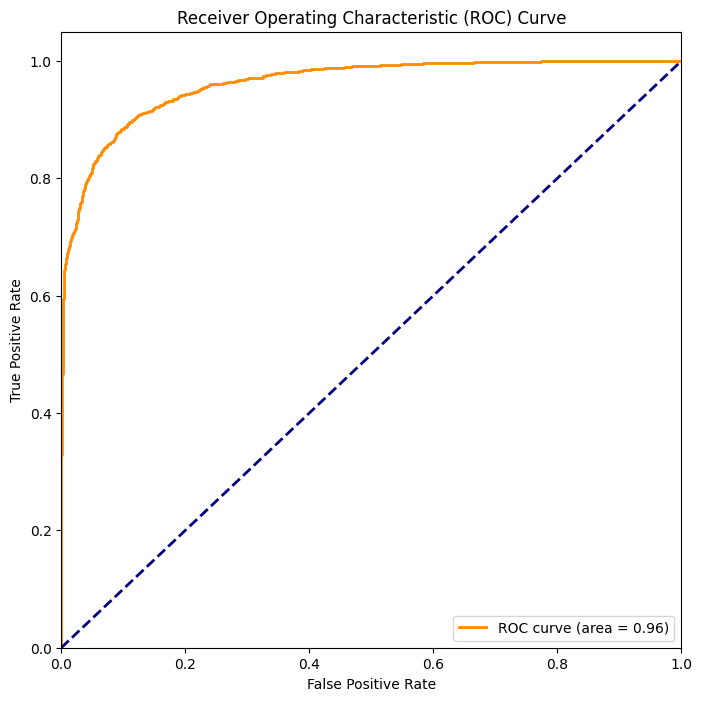

100%|██████████| 62/62 [00:30<00:00,  2.04it/s]


Epoch 33/50, Train Loss: 0.0844, Train Accuracy: 0.9654, Val Loss: 0.2611, Val Accuracy: 0.8770


100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


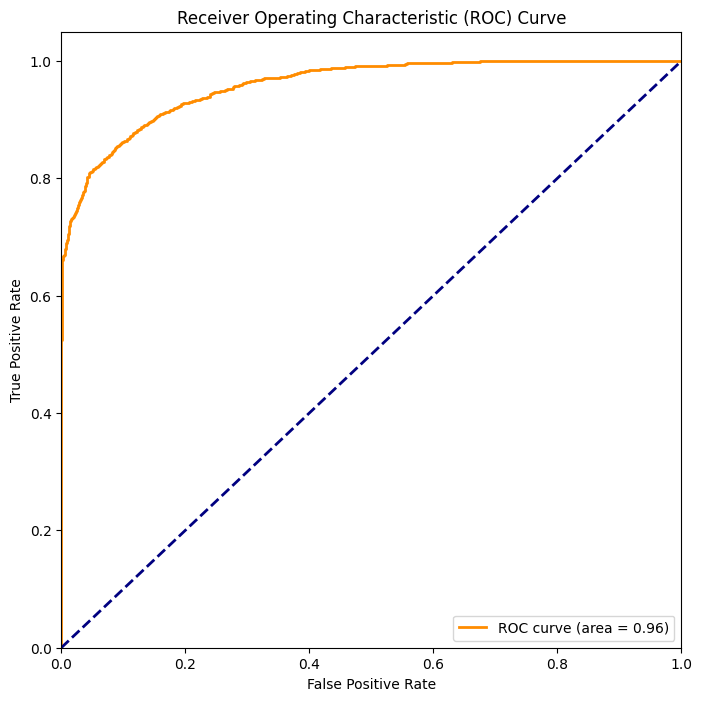

100%|██████████| 62/62 [00:30<00:00,  2.00it/s]


Epoch 34/50, Train Loss: 0.0800, Train Accuracy: 0.9645, Val Loss: 0.2815, Val Accuracy: 0.8856


100%|██████████| 62/62 [00:30<00:00,  2.03it/s]


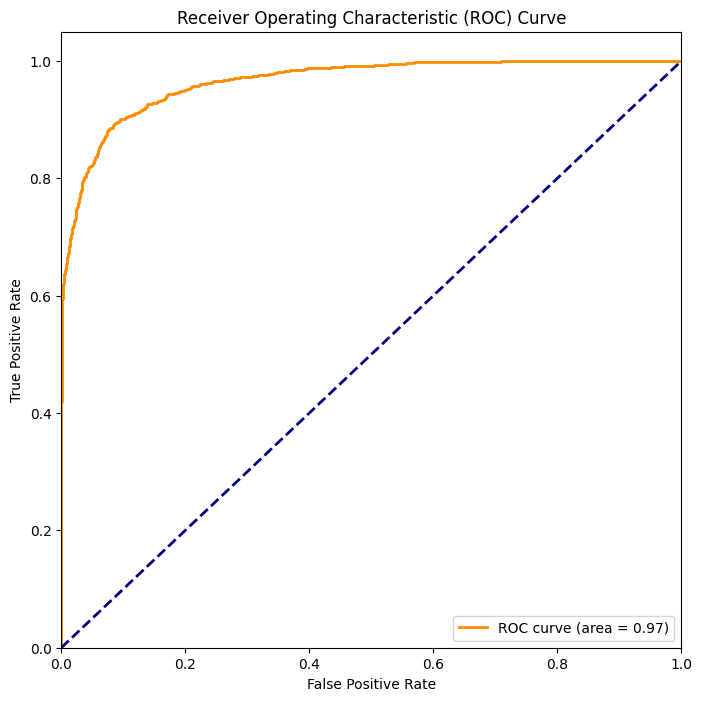

100%|██████████| 62/62 [00:30<00:00,  2.06it/s]


Epoch 35/50, Train Loss: 0.0769, Train Accuracy: 0.9684, Val Loss: 0.2296, Val Accuracy: 0.9058


100%|██████████| 62/62 [00:29<00:00,  2.07it/s]


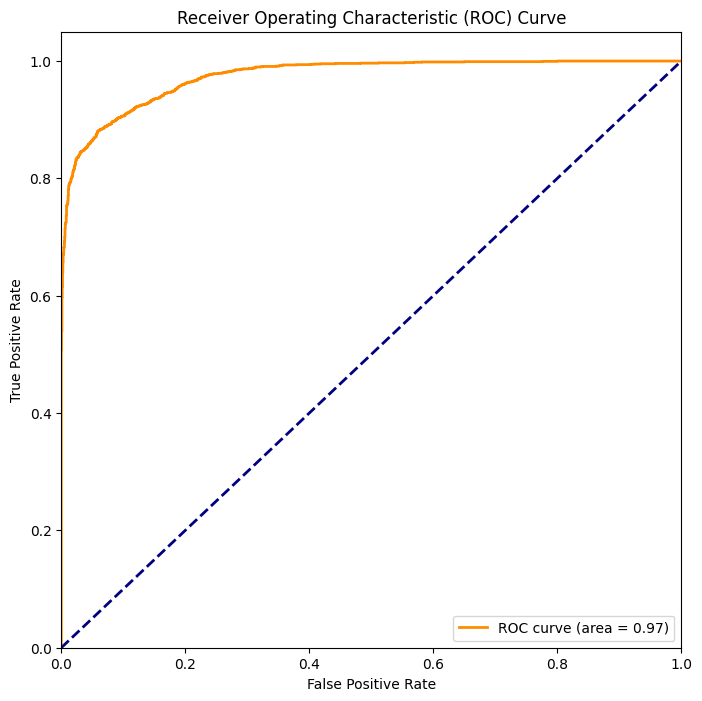

100%|██████████| 62/62 [00:30<00:00,  2.04it/s]


Epoch 36/50, Train Loss: 0.0810, Train Accuracy: 0.9645, Val Loss: 0.2390, Val Accuracy: 0.8917


100%|██████████| 62/62 [00:30<00:00,  2.05it/s]


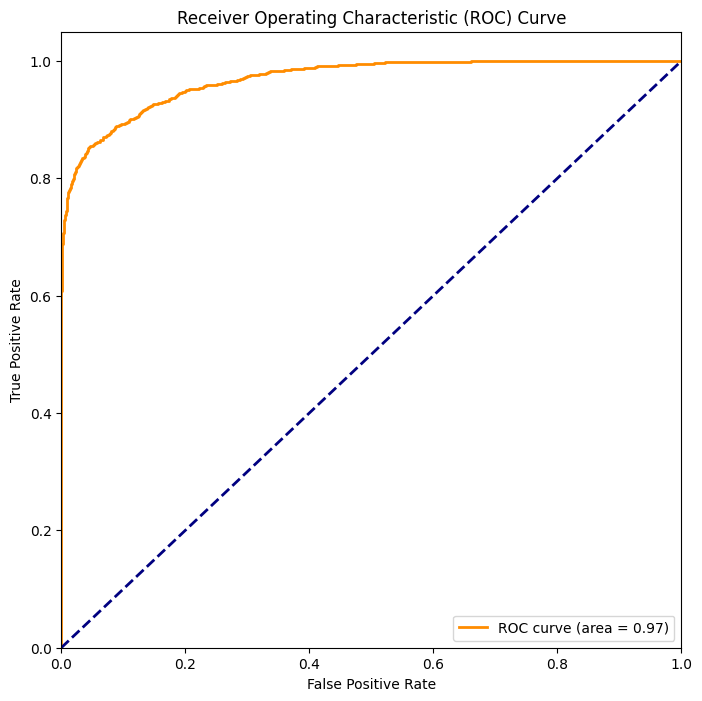

100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


Epoch 37/50, Train Loss: 0.0815, Train Accuracy: 0.9656, Val Loss: 0.2885, Val Accuracy: 0.8775


100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


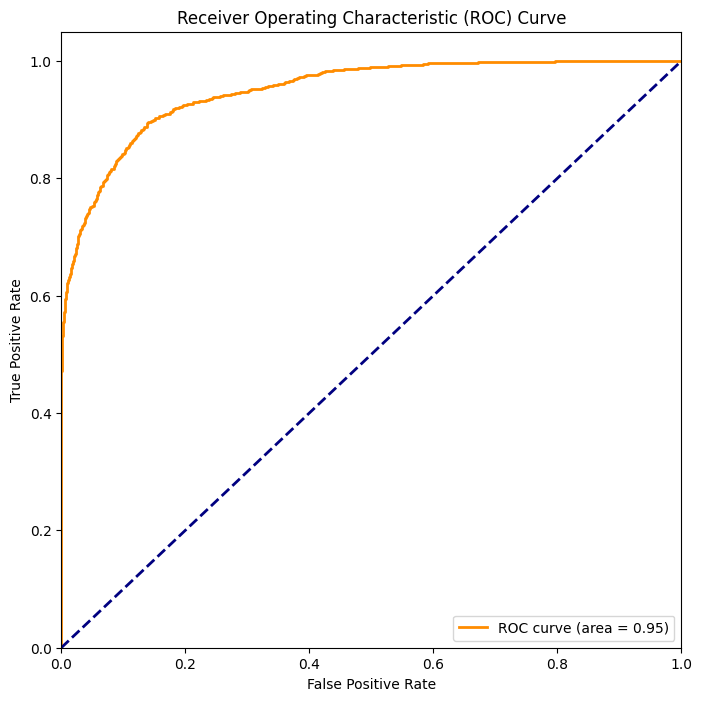

100%|██████████| 62/62 [00:28<00:00,  2.14it/s]


Epoch 38/50, Train Loss: 0.0759, Train Accuracy: 0.9690, Val Loss: 1.1120, Val Accuracy: 0.7533


100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


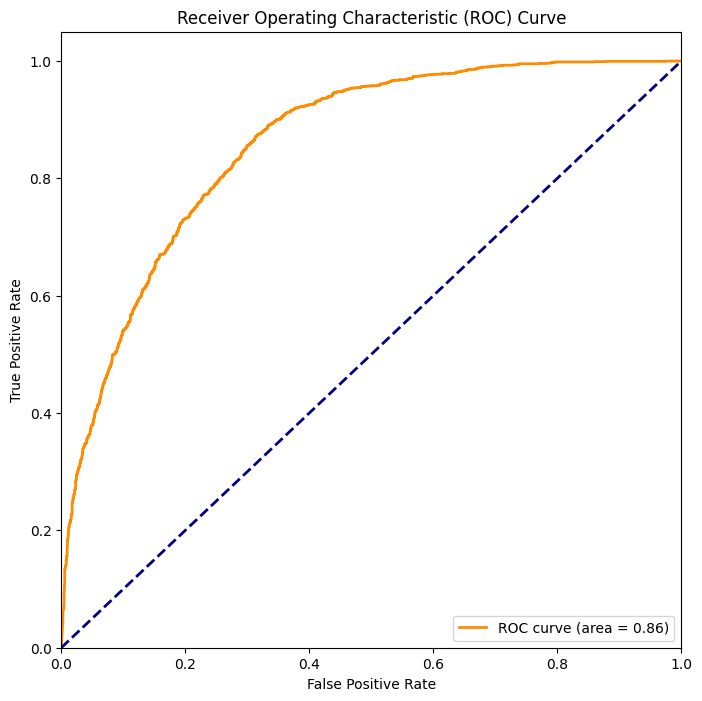

100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


Epoch 39/50, Train Loss: 0.0808, Train Accuracy: 0.9666, Val Loss: 0.4013, Val Accuracy: 0.8457


100%|██████████| 62/62 [00:29<00:00,  2.14it/s]


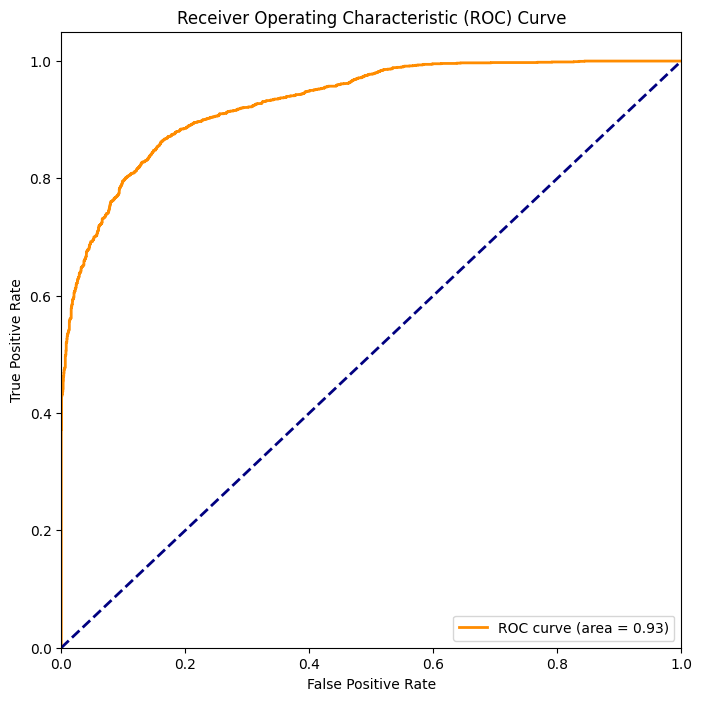

100%|██████████| 62/62 [00:28<00:00,  2.14it/s]


Epoch 40/50, Train Loss: 0.0773, Train Accuracy: 0.9672, Val Loss: 0.3024, Val Accuracy: 0.8780


100%|██████████| 62/62 [00:29<00:00,  2.07it/s]


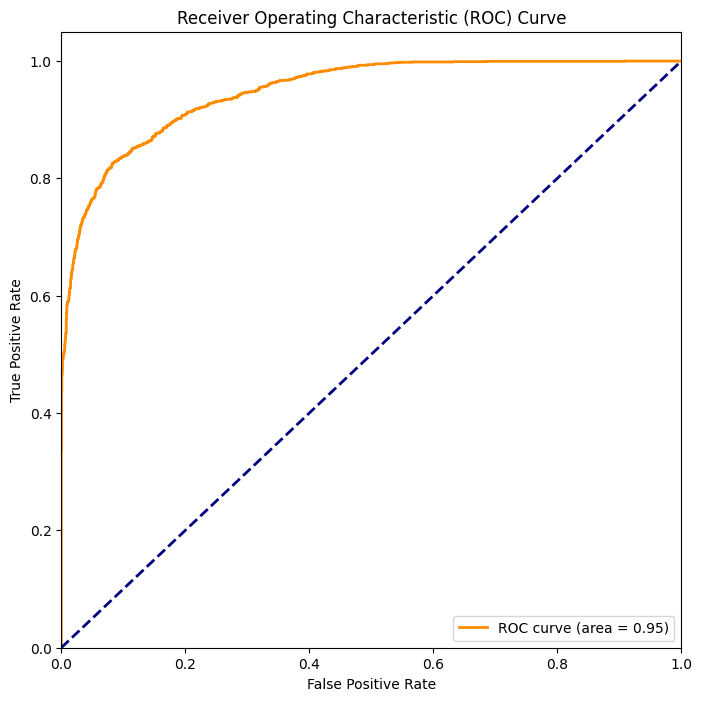

100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


Epoch 41/50, Train Loss: 0.0812, Train Accuracy: 0.9654, Val Loss: 0.3263, Val Accuracy: 0.8682


100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


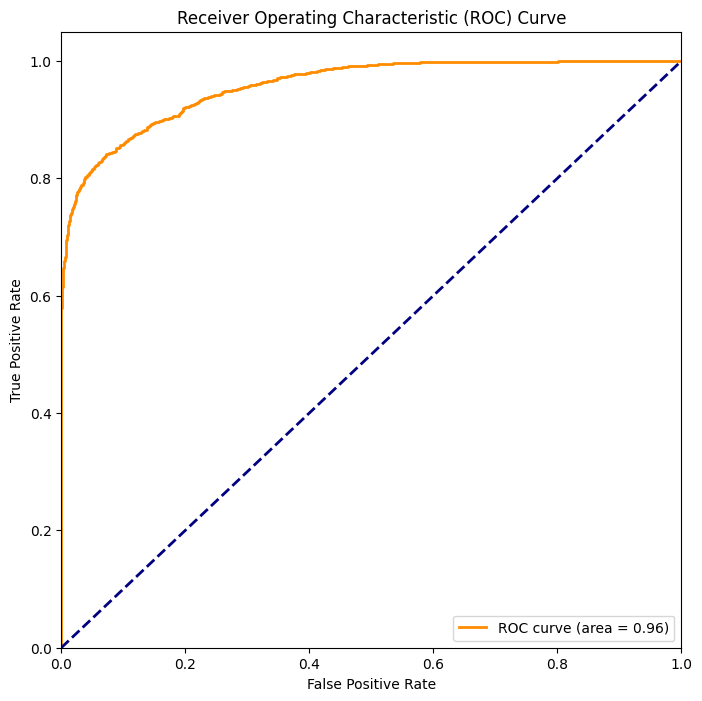

100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


Epoch 42/50, Train Loss: 0.0748, Train Accuracy: 0.9673, Val Loss: 0.4022, Val Accuracy: 0.8119


100%|██████████| 62/62 [00:30<00:00,  2.02it/s]


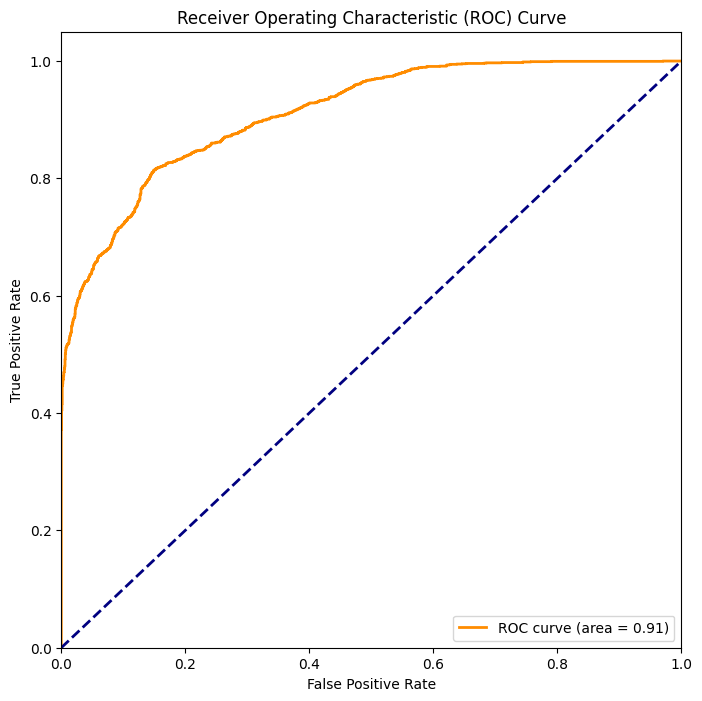

100%|██████████| 62/62 [00:28<00:00,  2.17it/s]


Epoch 43/50, Train Loss: 0.0767, Train Accuracy: 0.9687, Val Loss: 0.5483, Val Accuracy: 0.7338


100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


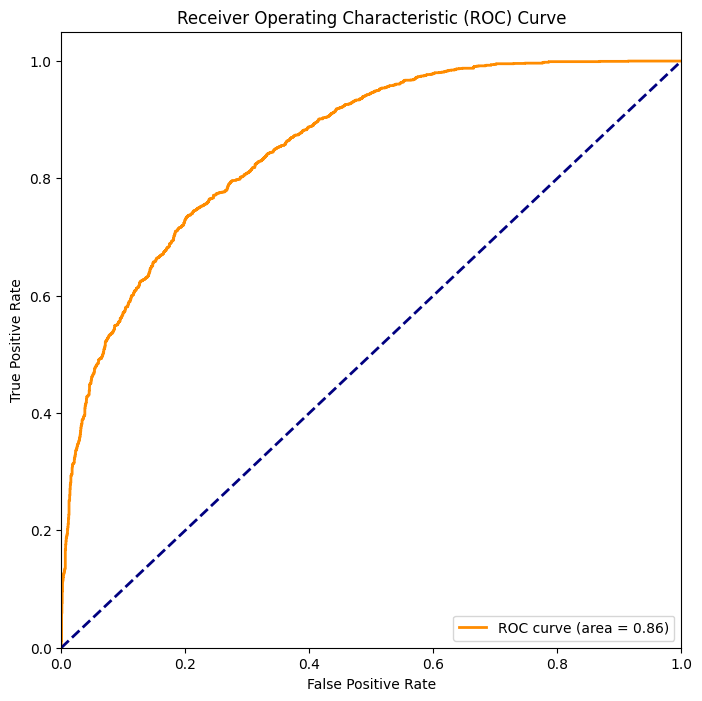

100%|██████████| 62/62 [00:30<00:00,  2.03it/s]


Epoch 44/50, Train Loss: 0.0709, Train Accuracy: 0.9688, Val Loss: 0.3514, Val Accuracy: 0.8730


100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


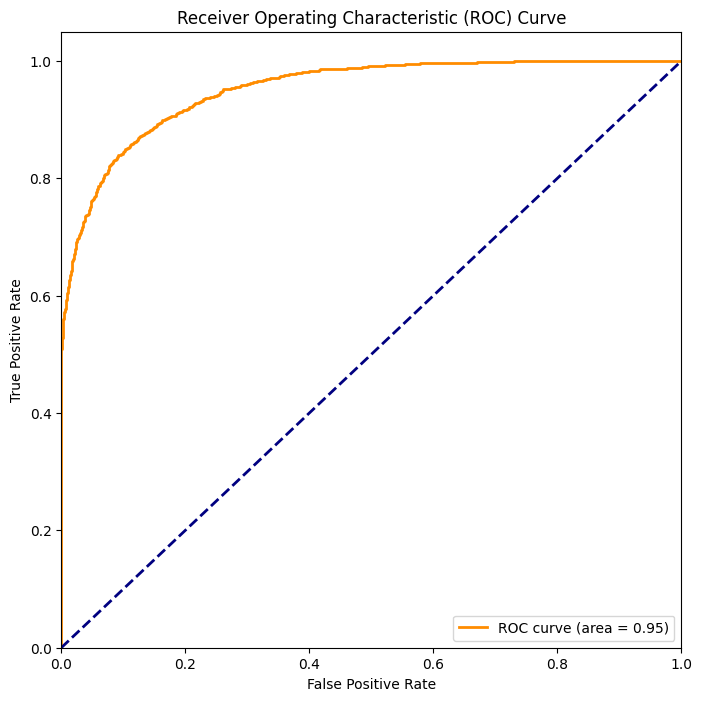

100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


Epoch 45/50, Train Loss: 0.1153, Train Accuracy: 0.9597, Val Loss: 1.8307, Val Accuracy: 0.8053


100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


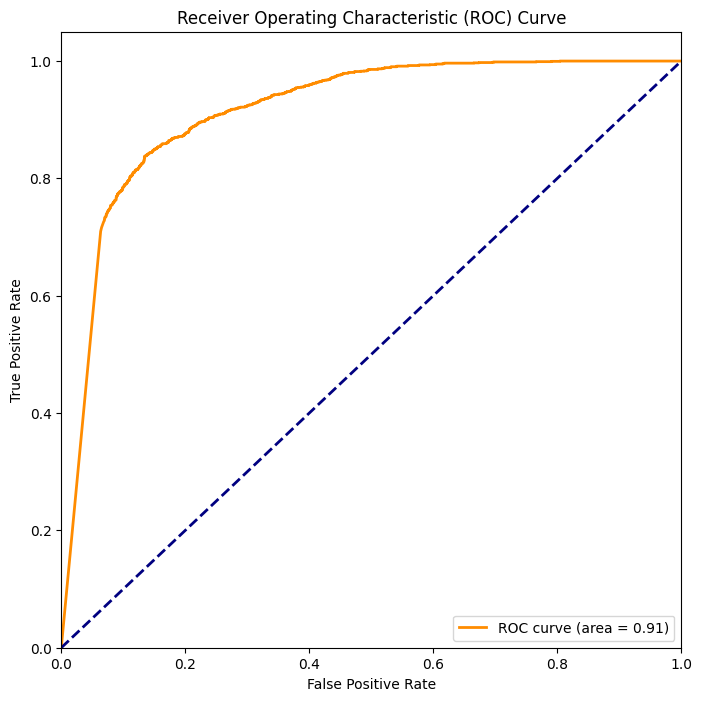

100%|██████████| 62/62 [00:30<00:00,  2.03it/s]


Epoch 46/50, Train Loss: 0.1193, Train Accuracy: 0.9534, Val Loss: 0.3512, Val Accuracy: 0.8265


100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


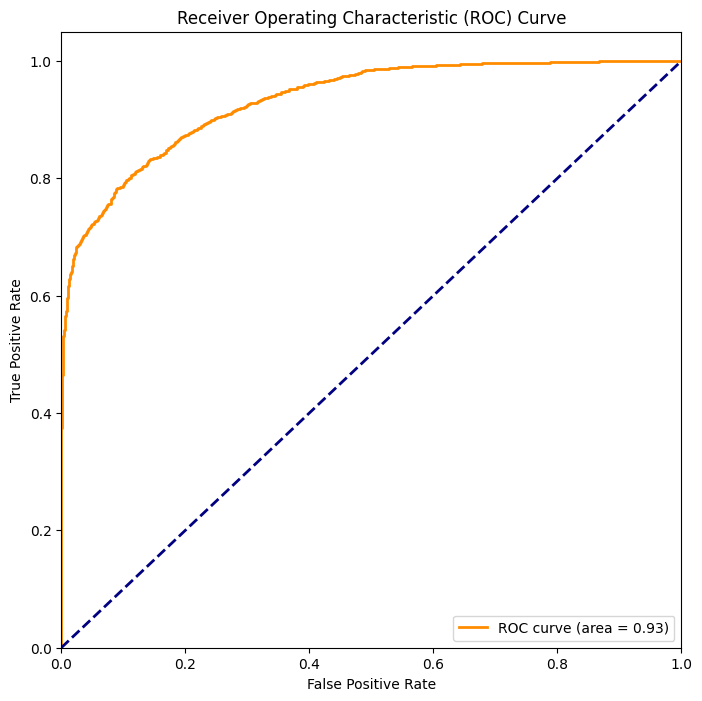

100%|██████████| 62/62 [00:30<00:00,  2.06it/s]


Epoch 47/50, Train Loss: 0.0934, Train Accuracy: 0.9609, Val Loss: 0.2447, Val Accuracy: 0.8907


100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


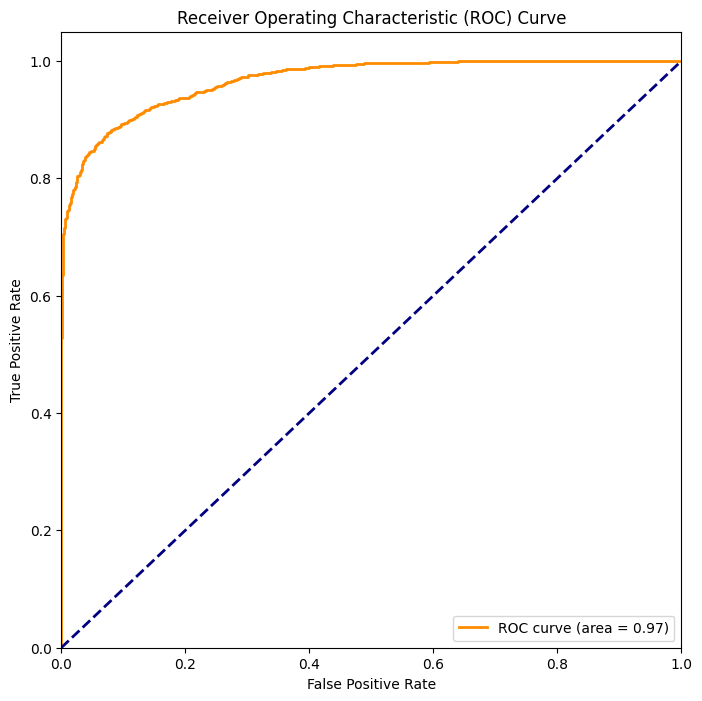

100%|██████████| 62/62 [00:28<00:00,  2.14it/s]


Epoch 48/50, Train Loss: 0.0841, Train Accuracy: 0.9614, Val Loss: 0.2556, Val Accuracy: 0.8912


100%|██████████| 62/62 [00:30<00:00,  2.04it/s]


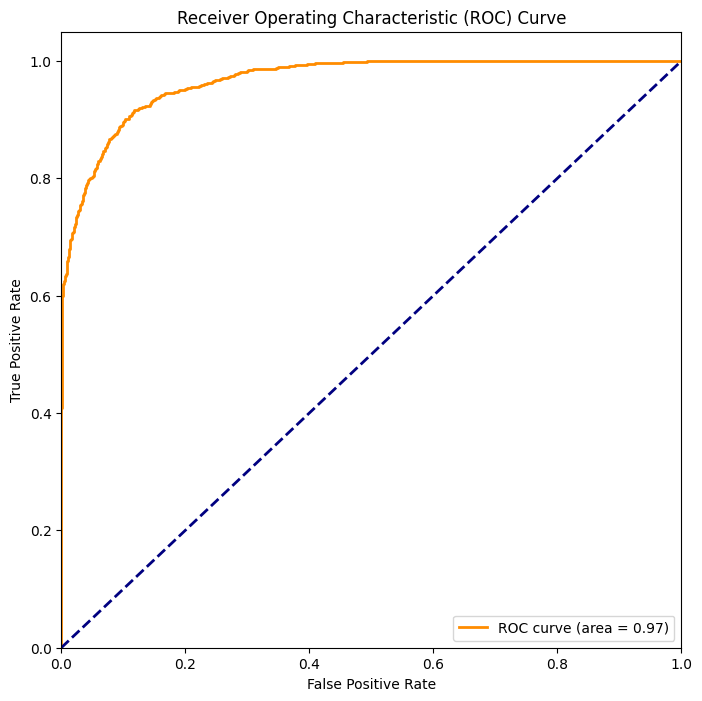

100%|██████████| 62/62 [00:30<00:00,  2.07it/s]


Epoch 49/50, Train Loss: 0.0768, Train Accuracy: 0.9666, Val Loss: 0.3803, Val Accuracy: 0.8396


100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


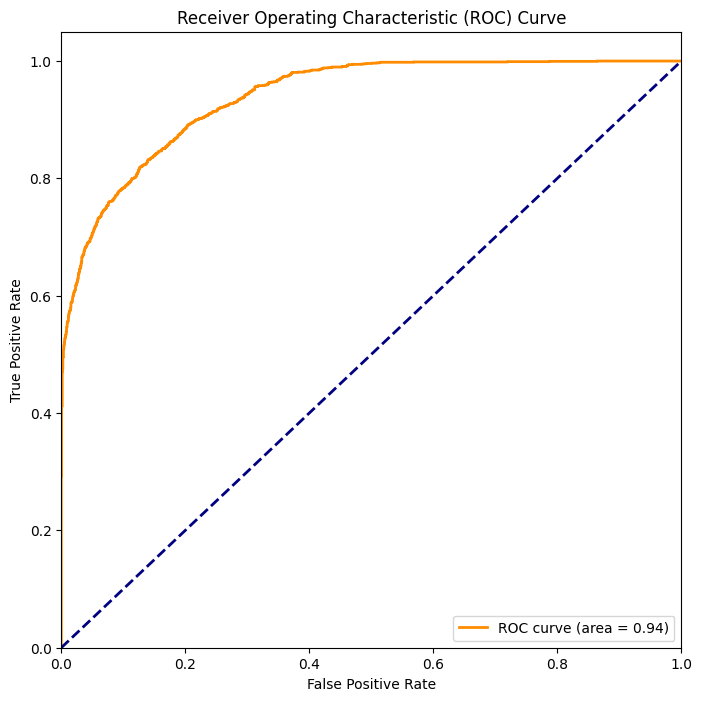

100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


Epoch 50/50, Train Loss: 0.0743, Train Accuracy: 0.9679, Val Loss: 0.2968, Val Accuracy: 0.8747


100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


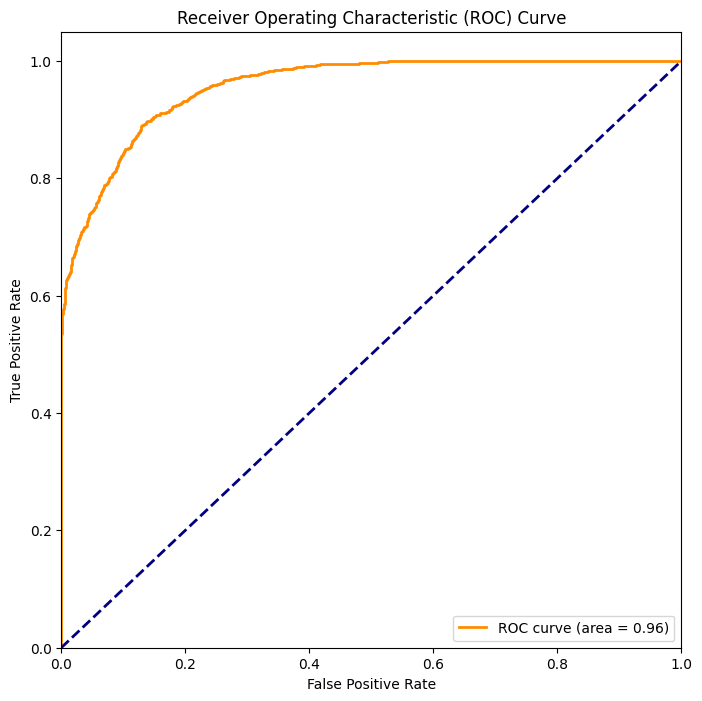

In [19]:
import torch.optim as optim
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Set up TensorBoard
writer = SummaryWriter('runs/mask_classification_experiment')

# Initialize WandB
import wandb
wandb.init(project="mask_classification")

# Training loop
epochs = 50

for epoch in range(epochs):
    model.train()
    running_loss = 0.00
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    writer.add_scalar('Loss/train', train_loss, epoch)
    writer.add_scalar('Accuracy/train', train_acc, epoch)
    wandb.log({"train_loss": train_loss, "train_acc": train_acc})

    model.eval()
    val_loss = 0.00
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for val_images, val_labels in tqdm(val_loader):
            val_images, val_labels = val_images.to(device), val_labels.to(device).float().unsqueeze(1)

            val_outputs = model(val_images)
            v_loss = criterion(val_outputs, val_labels)

            val_loss += v_loss.item()
            val_preds = torch.sigmoid(val_outputs) > 0.5
            val_correct += (val_preds == val_labels).sum().item()
            val_total += val_labels.size(0)

    val_loss = val_loss / len(val_loader)
    val_acc = val_correct / val_total
    writer.add_scalar('Loss/val', val_loss, epoch)
    writer.add_scalar('Accuracy/val', val_acc, epoch)
    wandb.log({"val_loss": val_loss, "val_acc": val_acc})

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

    # Import necessary libraries
    from sklearn.metrics import roc_curve, auc

    # Initialize lists to store true positive rate (TPR), false positive rate (FPR), and thresholds
    all_fpr = []
    all_tpr = []
    all_thresholds = []

    # Set model to evaluation mode
    model.eval()

    # Initialize empty lists to store predictions and labels for all validation samples
    all_val_preds = []
    all_val_labels = []

    # Loop through validation data
    with torch.no_grad():
        for val_images, val_labels in tqdm(val_loader):
            val_images, val_labels = val_images.to(device), val_labels.to(device).float().unsqueeze(1)

            # Get model predictions
            val_outputs = model(val_images)
            val_preds = torch.sigmoid(val_outputs)

            # Append predictions and labels to lists
            all_val_preds.append(val_preds.cpu().numpy())
            all_val_labels.append(val_labels.cpu().numpy())

    # Concatenate predictions and labels from all batches
    all_val_preds = np.concatenate(all_val_preds)
    all_val_labels = np.concatenate(all_val_labels)

    # Compute false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(all_val_labels, all_val_preds)

    # Compute area under the curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Append FPR, TPR, and thresholds to the lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_thresholds.append(thresholds)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


# Save model
torch.save(model.state_dict(), 'model.pth')
